In [1]:
import sys
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./heart_data/heart.csv")

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.shape

(303, 14)

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

# EDA

In [7]:
import seaborn as sns
sns.set_style("dark")

Text(0.5, 1.0, 'count of age')

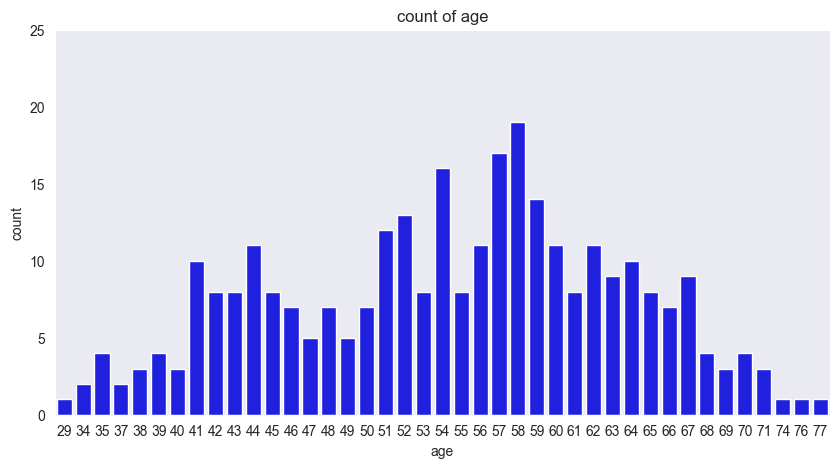

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(x='age', data=df,color='b');
plt.ylim(0,25)
plt.title("count of age")

In [9]:
heart_attack_df = df[df['output']==1]

In [10]:
heart_attack_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


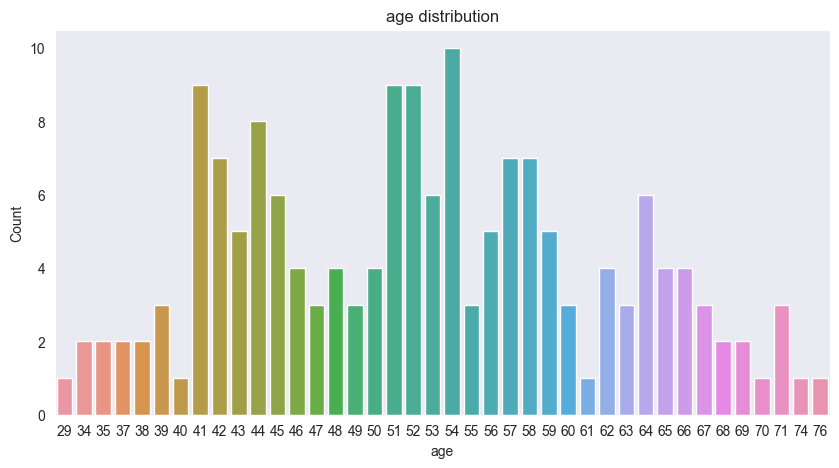

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x="age", data=heart_attack_df)
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('Count')
plt.show()

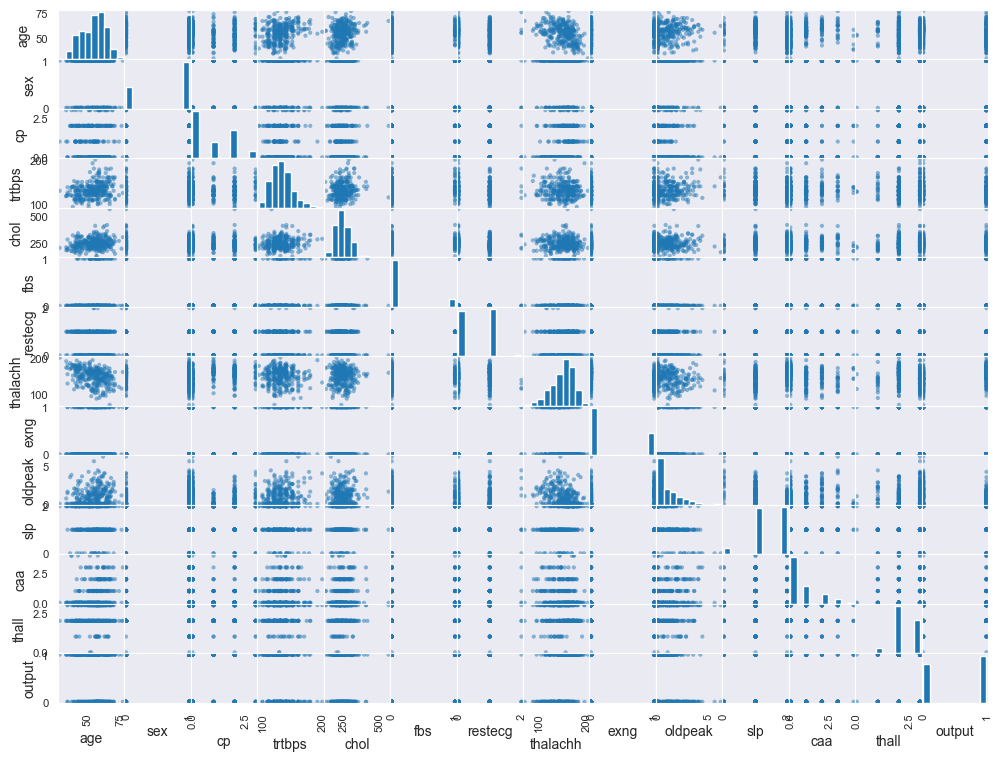

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(12,9));

# data preprocessing

In [24]:
X=df.drop(['output', 'caa'],axis=1)
y=df.output

In [25]:
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,2
3,56,1,1,120,236,0,1,178,0,0.8,2,2
4,57,0,0,120,354,0,1,163,1,0.6,2,2


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [27]:
X_train.shape

(242, 12)

# SGDClassifier

In [28]:
from sklearn.linear_model import SGDClassifier

In [29]:
sgd_clf = SGDClassifier(max_iter=500, tol=1e-3, random_state=42)
sgd_clf.fit(X_train , y_train)

SGDClassifier(max_iter=500, random_state=42)

In [30]:
sgd_prediction = sgd_clf.predict(X_test)

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.44444444, 0.59259259, 0.6       ])

In [33]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, sgd_prediction))

0.47540983606557374


# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
log_reg = LogisticRegression(max_iter=500, tol=1e-3, random_state=42)
log_reg.fit(X_train, y_train)

C:\Users\devof\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500, random_state=42, tol=0.001)

In [36]:
log_pred = log_reg.predict(X_test)

In [37]:
print(accuracy_score(y_test, log_pred))

0.8852459016393442


In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
forest_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
y_pred = forest_clf.predict(X_test)

In [42]:
from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.7685000000000001

In [43]:
import joblib 
joblib.dump(log_pred, "my_model.pkl")

['my_model.pkl']